In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# data downloaded from Supplemental Information from Himmelstein and Rodriguez, submitted to JGR-ES, October 2024.
data_dir = 'D:/crs/proj/2023_NCB_recovery/'
df = pd.read_csv(data_dir+'washout_water_data_UTC.csv')
# Drop samples (rows) without Hobo data
df=df.dropna(subset=['wtrlvl.1'])

# # Convert Date column to datetime
df['Dt']=pd.to_datetime(df['datetime'], format='%m/%d/%Y %H:%M')
# Calculate the time difference between consecutive entries
time_diffs = df['Dt'].diff()

# Display the unique time steps and their counts
print(time_diffs.value_counts())

# Optionally, get the most common time step
most_common_time_step = time_diffs.mode()[0]
print("Most common time step:", most_common_time_step)

Dt
0 days 00:10:00    67986
Name: count, dtype: int64
Most common time step: 0 days 00:10:00


In [2]:
# Smooth the data
df['mMax'] = df['wtrlvl'].rolling(window=6*13, min_periods=1).max()
df['oMax'] = df['wtrlvl.1'].rolling(window=6*13, min_periods=1).max()
df['oMed'] = df['wtrlvl.1'].rolling(window=6*50, min_periods=1).median()

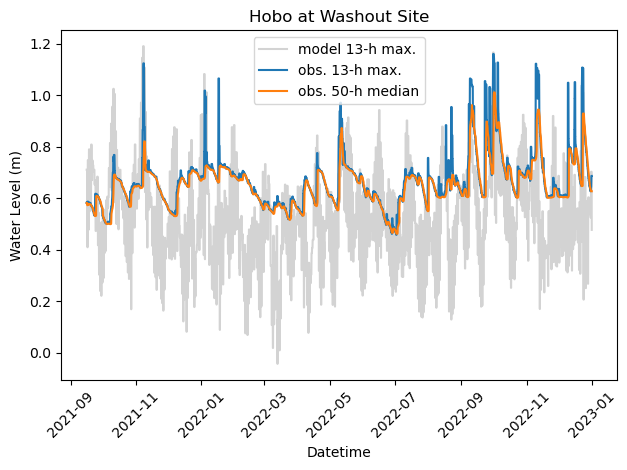

In [3]:
start_date = pd.to_datetime('2021-10-01')
end_date = pd.to_datetime('2022-10-01')
#plt.plot(df['Dt'],df['wtrlvl'])
plt.plot(df['Dt'],df['mMax'],'-',color='lightgray', label='model 13-h max.')
#plt.plot(df['Dt'], df['wtrlvl.1'], alpha=.6)
plt.plot(df['Dt'],df['oMax'],label='obs. 13-h max.')
plt.plot(df['Dt'],df['oMed'],label='obs. 50-h median')
# Set x-axis limits
#plt.xlim(start_date, end_date)

# Add labels and title
plt.xlabel('Datetime')
plt.ylabel('Water Level (m)')
plt.title('Hobo at Washout Site')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(data_dir+'hobo_model_washout.png', dpi=200, bbox_inches='tight')
